# -*- coding: utf-8 -*-
"""
Created on Wed Jul 17 23:13:41 2019

@author: JJ
"""

In [151]:
import numpy as np
import pandas as pd

from __future__ import print_function
 
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D,MaxPooling2D,Flatten
from keras.datasets import mnist

from keras.models import load_model

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [152]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
   
model.add(Conv2D(filters=36,kernel_size=(5,5),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
    
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
    
model.add(Dense(10,activation='softmax'))
    
    
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 activation_16 (Activation)  (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 14, 14, 36)        14436     
                                                                 
 activation_17 (Activation)  (None, 14, 14, 36)        0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 36)         0         
 g2D)                                                

In [153]:
batch_size = 256 # 批次大小
num_classes = 10 # 類別大小
epochs = 50 # 訓練迭代次數
(x_train, y_train), (x_test, y_test) = mnist.load_data()# 分割訓練集資料與測試集資料

In [154]:
x_test_bk = x_test.copy()   # 備份 X_test 資料集 (為了最後推論模型用)
y_test_bk = y_test.copy()   # 備份 Y_test 資料集

In [155]:
#調整目標樣本型態，訓練集資料
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [156]:
# 轉換類別向量為二進制分類
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [157]:
gen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08,
    data_format="channels_last"
)
gen.fit(x_train)
train_generator = gen.flow(x_train, y_train, batch_size)

In [158]:
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [159]:
learning_rate_function = ReduceLROnPlateau(
    monitor='val_acc',
    patience=3,
    verbose=1,
    factor=0.5,
    min_lr=0.000005
)

In [160]:
history = model.fit_generator(train_generator,
            steps_per_epoch=235,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test),
            callbacks=[learning_rate_function])
loss,acc = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', acc)

Epoch 1/50


<ipython-input-160-d99b172831f7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


235/235 [==============================] - ETA: 0s - loss: 0.5728 - accuracy: 0.8160

235/235 [==============================] - 23s 92ms/step - loss: 0.5728 - accuracy: 0.8160 - val_loss: 0.0705 - val_accuracy: 0.9768 - lr: 0.0010
Epoch 2/50
235/235 [==============================] - ETA: 0s - loss: 0.1927 - accuracy: 0.9429

235/235 [==============================] - 20s 85ms/step - loss: 0.1927 - accuracy: 0.9429 - val_loss: 0.0405 - val_accuracy: 0.9857 - lr: 0.0010
Epoch 3/50
235/235 [==============================] - ETA: 0s - loss: 0.1432 - accuracy: 0.9574

235/235 [==============================] - 21s 91ms/step - loss: 0.1432 - accuracy: 0.9574 - val_loss: 0.0327 - val_accuracy: 0.9879 - lr: 0.0010
Epoch 4/50
235/235 [==============================] - ETA: 0s - loss: 0.1162 - accuracy: 0.9657

235/235 [==============================] - 21s 89ms/step - loss: 0.1162 - accuracy: 0.9657 - val_loss: 0.0307 - val_accuracy: 0.9904 - lr: 0.0010
Epoch 5/50
235/235 [==============================] - ETA: 0s - loss: 0.1039 - accuracy: 0.9696

235/235 [==============================] - 20s 86ms/step - loss: 0.1039 - accuracy: 0.9696 - val_loss: 0.0234 - val_accuracy: 0.9917 - lr: 0.0010
Epoch 6/50
235/235 [==============================] - ETA: 0s - loss: 0.0934 - accuracy: 0.9720

235/235 [==============================] - 21s 90ms/step - loss: 0.0934 - accuracy: 0.9720 - val_loss: 0.0224 - val_accuracy: 0.9919 - lr: 0.0010
Epoch 7/50
235/235 [==============================] - ETA: 0s - loss: 0.0813 - accuracy: 0.9757

235/235 [==============================] - 21s 91ms/step - loss: 0.0813 - accuracy: 0.9757 - val_loss: 0.0187 - val_accuracy: 0.9933 - lr: 0.0010
Epoch 8/50
235/235 [==============================] - ETA: 0s - loss: 0.0804 - accuracy: 0.9765

235/235 [==============================] - 21s 88ms/step - loss: 0.0804 - accuracy: 0.9765 - val_loss: 0.0208 - val_accuracy: 0.9928 - lr: 0.0010
Epoch 9/50
235/235 [==============================] - ETA: 0s - loss: 0.0743 - accuracy: 0.9778

235/235 [==============================] - 20s 85ms/step - loss: 0.0743 - accuracy: 0.9778 - val_loss: 0.0204 - val_accuracy: 0.9927 - lr: 0.0010
Epoch 10/50
235/235 [==============================] - ETA: 0s - loss: 0.0684 - accuracy: 0.9801

235/235 [==============================] - 21s 89ms/step - loss: 0.0684 - accuracy: 0.9801 - val_loss: 0.0169 - val_accuracy: 0.9932 - lr: 0.0010
Epoch 11/50
235/235 [==============================] - ETA: 0s - loss: 0.0648 - accuracy: 0.9808

235/235 [==============================] - 21s 88ms/step - loss: 0.0648 - accuracy: 0.9808 - val_loss: 0.0202 - val_accuracy: 0.9934 - lr: 0.0010
Epoch 12/50
235/235 [==============================] - ETA: 0s - loss: 0.0623 - accuracy: 0.9815

235/235 [==============================] - 21s 88ms/step - loss: 0.0623 - accuracy: 0.9815 - val_loss: 0.0186 - val_accuracy: 0.9934 - lr: 0.0010
Epoch 13/50
235/235 [==============================] - ETA: 0s - loss: 0.0602 - accuracy: 0.9818

235/235 [==============================] - 21s 89ms/step - loss: 0.0602 - accuracy: 0.9818 - val_loss: 0.0170 - val_accuracy: 0.9933 - lr: 0.0010
Epoch 14/50
235/235 [==============================] - ETA: 0s - loss: 0.0590 - accuracy: 0.9828

235/235 [==============================] - 21s 89ms/step - loss: 0.0590 - accuracy: 0.9828 - val_loss: 0.0152 - val_accuracy: 0.9947 - lr: 0.0010
Epoch 15/50
235/235 [==============================] - ETA: 0s - loss: 0.0549 - accuracy: 0.9833

235/235 [==============================] - 21s 88ms/step - loss: 0.0549 - accuracy: 0.9833 - val_loss: 0.0184 - val_accuracy: 0.9936 - lr: 0.0010
Epoch 16/50
235/235 [==============================] - ETA: 0s - loss: 0.0538 - accuracy: 0.9832

235/235 [==============================] - 21s 91ms/step - loss: 0.0538 - accuracy: 0.9832 - val_loss: 0.0158 - val_accuracy: 0.9939 - lr: 0.0010
Epoch 17/50
235/235 [==============================] - ETA: 0s - loss: 0.0523 - accuracy: 0.9841

235/235 [==============================] - 21s 90ms/step - loss: 0.0523 - accuracy: 0.9841 - val_loss: 0.0148 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 18/50
235/235 [==============================] - ETA: 0s - loss: 0.0503 - accuracy: 0.9848

235/235 [==============================] - 20s 87ms/step - loss: 0.0503 - accuracy: 0.9848 - val_loss: 0.0162 - val_accuracy: 0.9940 - lr: 0.0010
Epoch 19/50
235/235 [==============================] - ETA: 0s - loss: 0.0475 - accuracy: 0.9854

235/235 [==============================] - 21s 91ms/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0158 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 20/50
235/235 [==============================] - ETA: 0s - loss: 0.0478 - accuracy: 0.9858

235/235 [==============================] - 21s 88ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0162 - val_accuracy: 0.9946 - lr: 0.0010
Epoch 21/50
235/235 [==============================] - ETA: 0s - loss: 0.0471 - accuracy: 0.9863

235/235 [==============================] - 20s 87ms/step - loss: 0.0471 - accuracy: 0.9863 - val_loss: 0.0152 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 22/50
235/235 [==============================] - ETA: 0s - loss: 0.0434 - accuracy: 0.9871

235/235 [==============================] - 20s 87ms/step - loss: 0.0434 - accuracy: 0.9871 - val_loss: 0.0159 - val_accuracy: 0.9946 - lr: 0.0010
Epoch 23/50
235/235 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9868

235/235 [==============================] - 21s 89ms/step - loss: 0.0442 - accuracy: 0.9868 - val_loss: 0.0130 - val_accuracy: 0.9956 - lr: 0.0010
Epoch 24/50
235/235 [==============================] - ETA: 0s - loss: 0.0471 - accuracy: 0.9860

235/235 [==============================] - 20s 87ms/step - loss: 0.0471 - accuracy: 0.9860 - val_loss: 0.0138 - val_accuracy: 0.9957 - lr: 0.0010
Epoch 25/50
235/235 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9870

235/235 [==============================] - 21s 91ms/step - loss: 0.0427 - accuracy: 0.9870 - val_loss: 0.0136 - val_accuracy: 0.9956 - lr: 0.0010
Epoch 26/50
235/235 [==============================] - ETA: 0s - loss: 0.0421 - accuracy: 0.9874

235/235 [==============================] - 21s 91ms/step - loss: 0.0421 - accuracy: 0.9874 - val_loss: 0.0128 - val_accuracy: 0.9956 - lr: 0.0010
Epoch 27/50
235/235 [==============================] - ETA: 0s - loss: 0.0402 - accuracy: 0.9876

235/235 [==============================] - 21s 88ms/step - loss: 0.0402 - accuracy: 0.9876 - val_loss: 0.0140 - val_accuracy: 0.9953 - lr: 0.0010
Epoch 28/50
235/235 [==============================] - ETA: 0s - loss: 0.0403 - accuracy: 0.9878

235/235 [==============================] - 21s 91ms/step - loss: 0.0403 - accuracy: 0.9878 - val_loss: 0.0148 - val_accuracy: 0.9948 - lr: 0.0010
Epoch 29/50
235/235 [==============================] - ETA: 0s - loss: 0.0432 - accuracy: 0.9869

235/235 [==============================] - 21s 89ms/step - loss: 0.0432 - accuracy: 0.9869 - val_loss: 0.0146 - val_accuracy: 0.9946 - lr: 0.0010
Epoch 30/50
235/235 [==============================] - ETA: 0s - loss: 0.0385 - accuracy: 0.9882

235/235 [==============================] - 21s 88ms/step - loss: 0.0385 - accuracy: 0.9882 - val_loss: 0.0123 - val_accuracy: 0.9953 - lr: 0.0010
Epoch 31/50
235/235 [==============================] - ETA: 0s - loss: 0.0388 - accuracy: 0.9880

235/235 [==============================] - 21s 91ms/step - loss: 0.0388 - accuracy: 0.9880 - val_loss: 0.0158 - val_accuracy: 0.9940 - lr: 0.0010
Epoch 32/50
235/235 [==============================] - ETA: 0s - loss: 0.0378 - accuracy: 0.9884

235/235 [==============================] - 21s 89ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.0147 - val_accuracy: 0.9945 - lr: 0.0010
Epoch 33/50
235/235 [==============================] - ETA: 0s - loss: 0.0349 - accuracy: 0.9887

235/235 [==============================] - 20s 85ms/step - loss: 0.0349 - accuracy: 0.9887 - val_loss: 0.0152 - val_accuracy: 0.9948 - lr: 0.0010
Epoch 34/50
235/235 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9896

235/235 [==============================] - 21s 89ms/step - loss: 0.0362 - accuracy: 0.9896 - val_loss: 0.0159 - val_accuracy: 0.9944 - lr: 0.0010
Epoch 35/50
235/235 [==============================] - ETA: 0s - loss: 0.0379 - accuracy: 0.9886

235/235 [==============================] - 21s 89ms/step - loss: 0.0379 - accuracy: 0.9886 - val_loss: 0.0139 - val_accuracy: 0.9951 - lr: 0.0010
Epoch 36/50
235/235 [==============================] - ETA: 0s - loss: 0.0352 - accuracy: 0.9891

235/235 [==============================] - 20s 84ms/step - loss: 0.0352 - accuracy: 0.9891 - val_loss: 0.0144 - val_accuracy: 0.9949 - lr: 0.0010
Epoch 37/50
235/235 [==============================] - ETA: 0s - loss: 0.0361 - accuracy: 0.9890

235/235 [==============================] - 21s 89ms/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0121 - val_accuracy: 0.9956 - lr: 0.0010
Epoch 38/50
235/235 [==============================] - ETA: 0s - loss: 0.0341 - accuracy: 0.9897

235/235 [==============================] - 21s 90ms/step - loss: 0.0341 - accuracy: 0.9897 - val_loss: 0.0139 - val_accuracy: 0.9945 - lr: 0.0010
Epoch 39/50
235/235 [==============================] - ETA: 0s - loss: 0.0347 - accuracy: 0.9896

235/235 [==============================] - 20s 84ms/step - loss: 0.0347 - accuracy: 0.9896 - val_loss: 0.0127 - val_accuracy: 0.9954 - lr: 0.0010
Epoch 40/50
235/235 [==============================] - ETA: 0s - loss: 0.0336 - accuracy: 0.9894

235/235 [==============================] - 21s 90ms/step - loss: 0.0336 - accuracy: 0.9894 - val_loss: 0.0137 - val_accuracy: 0.9950 - lr: 0.0010
Epoch 41/50
235/235 [==============================] - ETA: 0s - loss: 0.0322 - accuracy: 0.9901

235/235 [==============================] - 22s 93ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.0134 - val_accuracy: 0.9953 - lr: 0.0010
Epoch 42/50
235/235 [==============================] - ETA: 0s - loss: 0.0342 - accuracy: 0.9895

235/235 [==============================] - 21s 88ms/step - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0133 - val_accuracy: 0.9949 - lr: 0.0010
Epoch 43/50
235/235 [==============================] - ETA: 0s - loss: 0.0324 - accuracy: 0.9898

235/235 [==============================] - 21s 88ms/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0145 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 44/50
235/235 [==============================] - ETA: 0s - loss: 0.0327 - accuracy: 0.9905

235/235 [==============================] - 21s 91ms/step - loss: 0.0327 - accuracy: 0.9905 - val_loss: 0.0152 - val_accuracy: 0.9942 - lr: 0.0010
Epoch 45/50
235/235 [==============================] - ETA: 0s - loss: 0.0328 - accuracy: 0.9902

235/235 [==============================] - 21s 91ms/step - loss: 0.0328 - accuracy: 0.9902 - val_loss: 0.0143 - val_accuracy: 0.9948 - lr: 0.0010
Epoch 46/50
235/235 [==============================] - ETA: 0s - loss: 0.0319 - accuracy: 0.9905

235/235 [==============================] - 21s 87ms/step - loss: 0.0319 - accuracy: 0.9905 - val_loss: 0.0135 - val_accuracy: 0.9952 - lr: 0.0010
Epoch 47/50
235/235 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.9903

235/235 [==============================] - 21s 88ms/step - loss: 0.0317 - accuracy: 0.9903 - val_loss: 0.0173 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 48/50
235/235 [==============================] - ETA: 0s - loss: 0.0321 - accuracy: 0.9904

235/235 [==============================] - 21s 90ms/step - loss: 0.0321 - accuracy: 0.9904 - val_loss: 0.0129 - val_accuracy: 0.9961 - lr: 0.0010
Epoch 49/50
235/235 [==============================] - ETA: 0s - loss: 0.0316 - accuracy: 0.9904

235/235 [==============================] - 21s 88ms/step - loss: 0.0316 - accuracy: 0.9904 - val_loss: 0.0152 - val_accuracy: 0.9948 - lr: 0.0010
Epoch 50/50
235/235 [==============================] - ETA: 0s - loss: 0.0315 - accuracy: 0.9904

235/235 [==============================] - 21s 88ms/step - loss: 0.0315 - accuracy: 0.9904 - val_loss: 0.0142 - val_accuracy: 0.9957 - lr: 0.0010
Test loss: 0.014231394976377487
Test accuracy: 0.9957000017166138


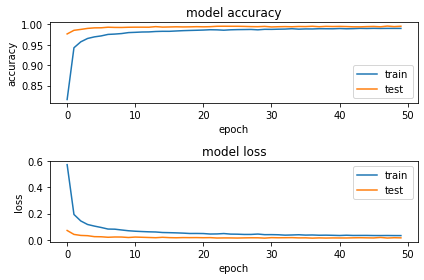

In [161]:

#透過matplot繪圖顯示訓練過程
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.tight_layout()
plt.show()

In [162]:
# 計算分類的預測值
print("\nPredicting ...")
y_pred = model.predict(x_test)
y_pred_classes= np.argmax(y_pred,axis=1)

# 顯示混淆矩陣
tb = pd.crosstab(y_test_bk.astype(int), y_pred_classes.astype(int), rownames=["label"], colnames=["predict"])
print(tb)


Predicting ...
313/313 [==============================] - 1s 2ms/step
predict    0     1     2     3    4    5    6     7    8     9
label                                                         
0        978     0     0     0    0    0    0     1    1     0
1          0  1133     1     0    0    0    0     1    0     0
2          0     0  1030     1    0    0    0     1    0     0
3          0     0     1  1009    0    0    0     0    0     0
4          0     0     0     0  980    0    0     0    0     2
5          0     0     0     6    0  884    1     0    0     1
6          2     2     2     0    0    0  950     0    2     0
7          0     1     2     1    0    0    0  1022    1     1
8          1     0     2     1    0    1    0     0  969     0
9          0     0     0     0    6    0    0     0    1  1002


In [163]:
model.save("mnist_cnn.h5")

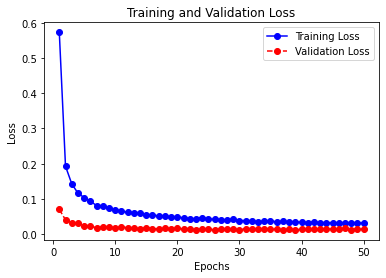

In [164]:
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


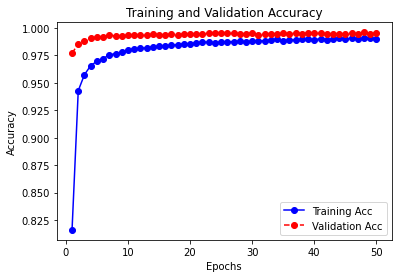

In [165]:
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [166]:
# 亂數選一個測試的數字圖片 
i = np.random.randint(0, len(x_test))
digit = x_test_bk[i].reshape(28, 28)
# 將圖片轉換成 4D 張量
X_test_digit = x_test_bk[i].reshape(1, 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_test_digit = X_test_digit / 255

In [167]:
# 建立Keras的Sequential模型
model_inference = Sequential()
model_inference = load_model("mnist_cnn.h5")
# 編譯模型
model_inference.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

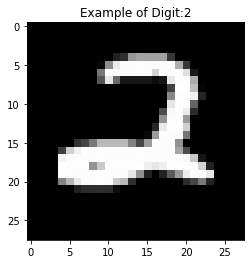

In [168]:
# 繪出圖表的預測結果
plt.figure()
plt.title("Example of Digit:" + str(y_test_bk[i]))
plt.imshow(digit, cmap="gray")

In [169]:
# 預測結果的機率
print("Predicting ...")
probs = model_inference.predict(X_test_digit, batch_size=1)
print(probs)

Predicting ...
1/1 [==============================] - 0s 81ms/step
[[2.3683399e-17 1.3623241e-16 1.0000000e+00 9.1769853e-13 3.9829806e-15
  3.2085744e-19 8.3917147e-19 3.9597097e-12 4.2806216e-14 4.0582507e-17]]


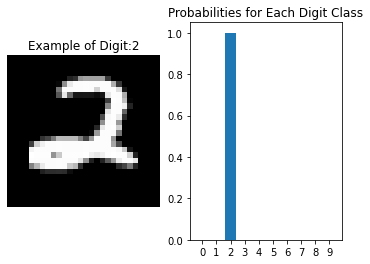

In [170]:
# 繪出圖表的預測結果
plt.figure()
plt.subplot(1,2,1)
plt.title("Example of Digit:" + str(y_test_bk[i]))
plt.imshow(digit, cmap="gray")
plt.axis("off")
plt.subplot(1,2,2)
plt.title("Probabilities for Each Digit Class")
plt.bar(np.arange(10), probs.reshape(10), align="center")
plt.xticks(np.arange(10),np.arange(10).astype(str))
plt.show()

In [171]:
# 測試資料集的分類和機率的預測值
y_pred_probs = model_inference.predict(x_test)     # 預測機率
y_pred_classes= np.argmax(y_pred_probs,axis=1)   # 轉成分類

313/313 [==============================] - 1s 2ms/step


In [172]:
# 建立分類錯誤的 DataFrame 物件
df = pd.DataFrame({"label":y_test_bk, "predict":y_pred_classes})
df = df[y_test_bk!=y_pred_classes]  # 篩選出分類錯誤的資料
print(df.head()) # 看前五筆分類錯誤

      label  predict
445       6        0
582       8        2
674       5        3
726       7        3
1014      6        8


0 Index:  5654


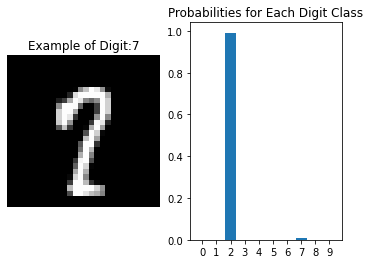

1 Index:  9679


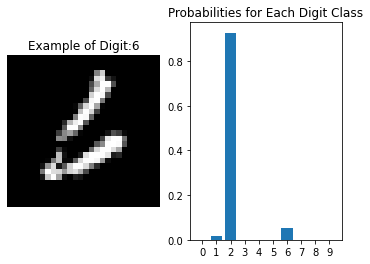

2 Index:  6597


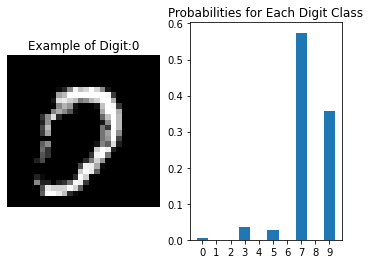

3 Index:  4201


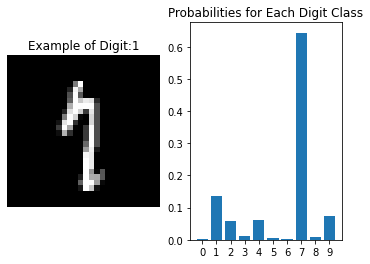

4 Index:  4823


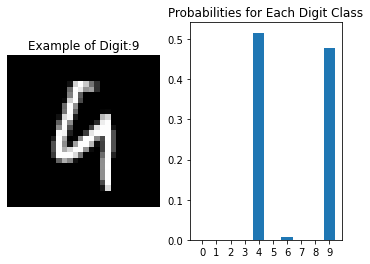

5 Index:  4443


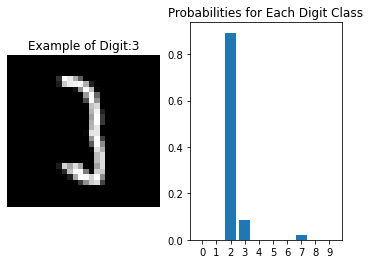

6 Index:  726


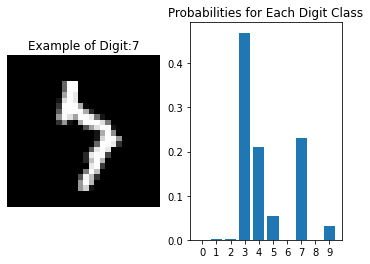

7 Index:  6651


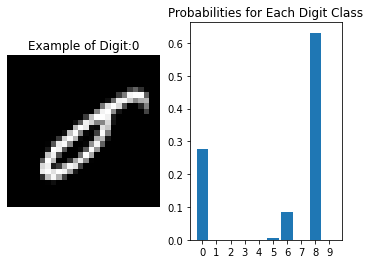

8 Index:  5937


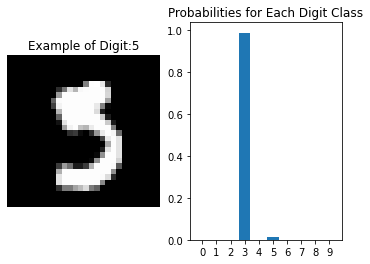

9 Index:  3762


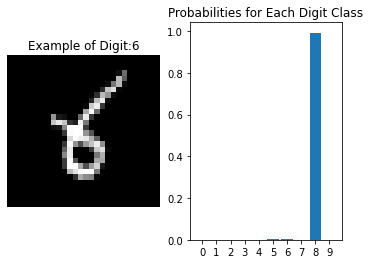

In [173]:
# 隨機選 1 個錯誤分類的數字索引
l = 0
while l<10 and df.size!=0:
  i = df.sample(n=1,replace=False).index.values.astype(int)[0]
  print(l ,"Index: ", i)
  digit = x_test_bk[i].reshape(28, 28) 
  # 繪出圖表的預測結果
  plt.figure()
  plt.subplot(1,2,1)
  plt.title("Example of Digit:" + str(y_test_bk[i]))
  plt.imshow(digit, cmap="gray")
  plt.axis("off")
  plt.subplot(1,2,2)
  plt.title("Probabilities for Each Digit Class")
  plt.bar(np.arange(10), y_pred_probs[i].reshape(10), align="center")
  plt.xticks(np.arange(10),np.arange(10).astype(str))
  plt.show()
  l+=1

In [174]:
# 預測錯誤的筆數
len(df)

43